In [10]:
using GeoSteerings
using POMDPs
using POMDPSimulators
using Random
using DiscreteValueIteration

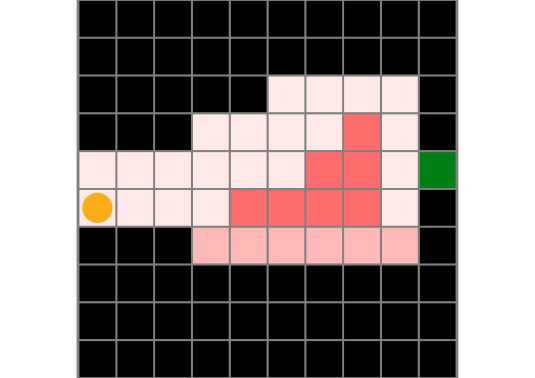

In [6]:
gs = GeoSteering()
plot1 = GeoSteerings.render(gs, (s=[1,5],))

In this 10x10 grid problem, black cells mean some subsurface blocks (impenetrable). Red cells mean drillable, but subject to some cost (darker color means more expensive to drill). Green cells mean drillable (target), which upon reached will terminate the simulation. 

The goal is to determine the sequence of drill directions (forward, top, or bottom) from orange circle location to green cell to achieve the minimum cost.

In [7]:
#offline solver
solver = ValueIterationSolver(max_iterations=1000);
policy = solve(solver, gs)

ValueIterationPolicy:
 [1, 1] -> :up
 [2, 1] -> :up
 [3, 1] -> :up
 [4, 1] -> :up
 [5, 1] -> :up
 [6, 1] -> :up
 [7, 1] -> :up
 [8, 1] -> :up
 [9, 1] -> :up
 [10, 1] -> :up
 [1, 2] -> :up
 [2, 2] -> :up
 [3, 2] -> :up
 [4, 2] -> :up
 [5, 2] -> :up
 [6, 2] -> :up
 [7, 2] -> :up
 [8, 2] -> :up
 [9, 2] -> :up
 …

In [8]:
hr = HistoryRecorder(max_steps=100, rng=MersenneTwister(1))
hist = simulate(hr, gs, policy)

15-element SimHistory{@NamedTuple{s::StaticArraysCore.SVector{2, Int64}, a::Symbol, sp::StaticArraysCore.SVector{2, Int64}, r::Float64, info::Nothing, t::Int64, action_info::Nothing}, Float64}:
 (s = [1, 5], a = :up, sp = [1, 6], r = -1.0, info = nothing, t = 1, action_info = nothing)
 (s = [1, 6], a = :right, sp = [2, 6], r = -1.0, info = nothing, t = 2, action_info = nothing)
 (s = [2, 6], a = :right, sp = [3, 6], r = -1.0, info = nothing, t = 3, action_info = nothing)
 (s = [3, 6], a = :right, sp = [4, 6], r = -1.0, info = nothing, t = 4, action_info = nothing)
 (s = [4, 6], a = :up, sp = [4, 7], r = -1.0, info = nothing, t = 5, action_info = nothing)
 (s = [4, 7], a = :right, sp = [5, 7], r = -1.0, info = nothing, t = 6, action_info = nothing)
 (s = [5, 7], a = :right, sp = [6, 7], r = -1.0, info = nothing, t = 7, action_info = nothing)
 (s = [6, 7], a = :up, sp = [6, 8], r = -1.0, info = nothing, t = 8, action_info = nothing)
 (s = [6, 8], a = :right, sp = [7, 8], r = -1.0, info =

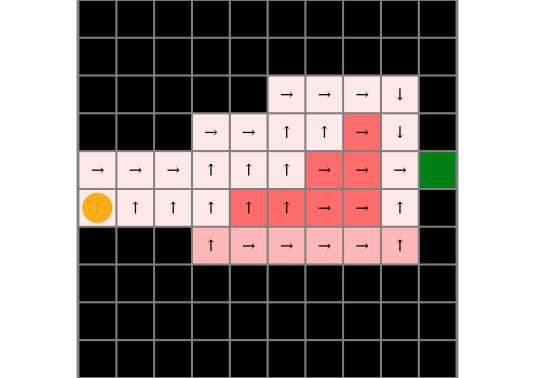

In [11]:
plot2 = GeoSteerings.render(gs, (s=[1,5],), policy=policy)